## Voting Classifier

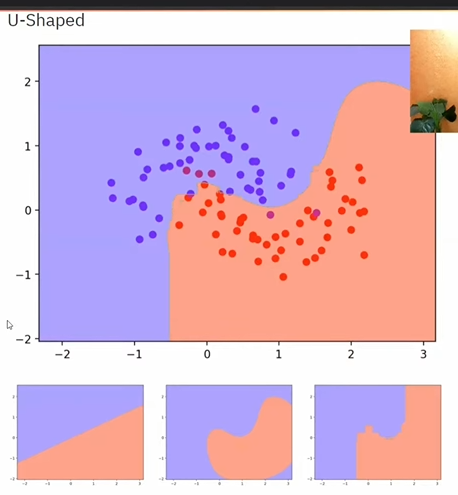

The combined decision boundaries generalize much better

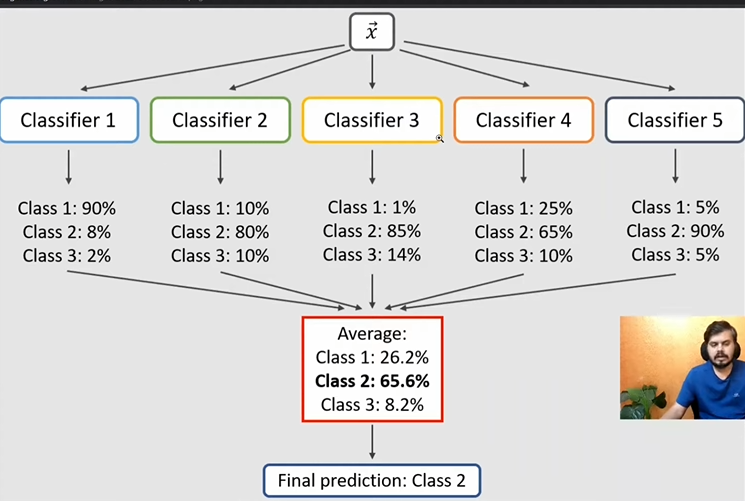

We average the probabilities if it is soft voting ensemble

# 🗳️ Soft vs Hard Voting in Ensemble Learning

## 📌 What is Voting Ensemble?

A **voting ensemble** combines multiple models (usually classifiers) and makes a final prediction based on their outputs.

Two main types:
- **Hard Voting**: Majority class label wins
- **Soft Voting**: Average predicted probabilities are used

---

## 🧱 Hard Voting

### 🧠 Intuition:
Each model gives a class label → the class that **appears most frequently** is chosen.

### 📊 Example:

3 classifiers give:
- Model A: Class 1  
- Model B: Class 2  
- Model C: Class 2  

**Hard Voting Output**: Class 2 (majority wins)

### 📌 Formula:
Let $h_i(x)$ be the class predicted by the $i^{th}$ classifier:

$$
\hat{y} = \text{mode}\{ h_1(x), h_2(x), ..., h_n(x) \}
$$

### ✅ Pros:
- Simple and fast
- Works even if models don’t support probability outputs

### ❌ Cons:
- Ignores confidence of individual models
- All models have equal weight

---

## 💧 Soft Voting

### 🧠 Intuition:
Each model predicts **probabilities** → average them → choose class with **highest average probability**

### 📊 Example:

| Class | Model A | Model B | Model C | Avg |
|-------|---------|---------|---------|-----|
| 0     | 0.2     | 0.4     | 0.3     | 0.3 |
| 1     | 0.8     | 0.6     | 0.7     | 0.7 |

**Soft Voting Output**: Class 1 (higher avg probability)

### 📌 Formula:
Let $P_i(c|x)$ be the predicted probability of class $c$ by model $i$:

$$
\hat{y} = \arg\max_c \left( \frac{1}{n} \sum_{i=1}^{n} P_i(c|x) \right)
$$

### ✅ Pros:
- Takes confidence into account
- Generally performs better if models are well-calibrated

### ❌ Cons:
- Requires models to output probabilities (e.g., Logistic Regression, not standard SVM)
- Can be sensitive to poorly calibrated models

---

## 🆚 Comparison Table

| Feature           | Hard Voting                         | Soft Voting                          |
|------------------|-------------------------------------|--------------------------------------|
| Input            | Class labels                        | Predicted probabilities              |
| Decision         | Majority vote                       | Highest average probability          |
| Model Requirement| Any classifier                      | Must support `predict_proba()`       |
| Use Case         | Simple scenarios                    | Probabilistic or well-calibrated models |
| Sensitivity      | Insensitive to confidence           | Sensitive to model calibration       |
| Performance      | Sometimes worse                     | Generally better                     |

---

## 🔍 When to Use

| Scenario                                | Use This       |
|----------------------------------------|----------------|
| All models output class labels only    | Hard Voting    |
| Models support probability prediction  | Soft Voting    |
| Want to consider model confidence      | Soft Voting    |
| Simple majority suffices               | Hard Voting    |

---

## 📦 Scikit-Learn Code

```python
from sklearn.ensemble import VotingClassifier

# Hard Voting
hard_vote = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('svc', clf3)
], voting='hard')

# Soft Voting (requires predict_proba)
soft_vote = VotingClassifier(estimators=[
    ('lr', clf1), ('rf', clf2), ('svc', clf3)
], voting='soft')


# 📌 When to Use Soft vs Hard Voting

## ✅ Use Hard Voting When:

1. **Models don’t support probability estimates**  
   - e.g., standard **SVM**, **KNN**, or **Decision Trees** without `predict_proba`
   - Useful in low-resource or legacy settings

2. **You have strong, diverse models with similar accuracy**  
   - Confidence scores are less important  
   - Each model acts as a democratic "vote"

3. **Need faster inference**  
   - No need to compute or store probability distributions

4. **Data is noisy**  
   - Probability estimates might be misleading if calibration is poor

---

## ✅ Use Soft Voting When:

1. **Models support well-calibrated probabilities**  
   - e.g., **Logistic Regression**, **Random Forest**, **Gradient Boosting**

2. **You care about confidence/uncertainty in predictions**  
   - e.g., **Medical diagnosis**, **credit scoring**, **fraud detection**

3. **Class imbalance exists**  
   - Probabilities give more nuanced decision boundaries

4. **You want better performance**  
   - Soft voting usually performs better in practice if model probabilities are trustworthy

5. **You want to assign weights to models**  
   - Soft voting allows for **weighted averaging of probabilities**

---

## 🧪 Summary Decision Guide

| Situation                                    | Recommendation |
|---------------------------------------------|----------------|
| Class labels only available                 | Hard Voting    |
| Well-calibrated probability estimates       | Soft Voting    |
| Want to factor in model confidence          | Soft Voting    |
| Fast + simple solution needed               | Hard Voting    |
| Unbalanced dataset                          | Soft Voting    |
| Models vary greatly in accuracy/confidence  | Soft Voting    |
| Models are diverse but equally good         | Hard Voting    |

---
